* ##############################################
* ######### 전국 민간 아파트 분양가격 분석하기 ######### 
* ##############################################

# import

In [2]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('pandas', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
plt.rc("font", family="Malgun Gothic") # window
#plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.0
pandas 0.13.2


# 전처리코드 정리 (최종)

In [3]:
####### df_2023 전처리하기
df_2023 = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','
df_2023.head()
df_2023.info()

### ==> 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_2023_nn=df_2023.loc[df_2023['분양가격(제곱미터)'].notnull()]

# ### ==> 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형 | 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_2023_ft=df_2023_nn.copy()
df_2023_ft['분양가격(제곱미터)']=pd.to_numeric(df_2023_ft['분양가격(제곱미터)'], errors='coerce')
df_2023_ft=df_2023_ft.loc[df_2023_ft['분양가격(제곱미터)'].notnull()]

### ==> 3) '분양가격(제곱미터)'을  '평당분양가격'으로 변환하기 (단 column이름은 '분양가격') (참고: 3w자료에서는 평당분양가격임)
df_2023_ft["분양가격"]=df_2023_ft['분양가격(제곱미터)'] * 3.3
df_prep=df_2023_ft.drop(columns=['분양가격(제곱미터)'])

### ==> 4) '규모구분'을 '전용면적'으로 변환하기
def parse_area_only(x):
    x2=x.replace("모든면적", "전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3
    
df_prep["전용면적"] = df_prep["규모구분"].map(parse_area_only)
df_prep=df_prep.drop(columns=['규모구분'], errors='ignore') # '규모구분' column이 없는 경우 error raise 방지

## ==> 5) reset_index 후 전처리한 데이터 확인하기
df_prep=df_prep.reset_index(drop=True)

df_prep.head()
df_prep.info()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     7322 non-null   object 
 1   연도      7322 non-null   int64  
 2   월       7322 non-null   int64  
 3   분양가격    7322 non-null   float64
 4   전용면적    7322 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 286.1+ KB


# groupby vs pivot_table
* groupby return형: series
* pivot_table return형: dataframe

## 전용면적별 분양가격의 평균을 groupby와 pivot_table 함수를 활용해 각각 구하시오

In [6]:
## groupby
'################# groupby: series'
df_prep.groupby(['전용면적'])['분양가격'].mean()
'################# groupby: dataframe'
df_prep.groupby(['전용면적'])['분양가격'].mean().to_frame()

## pivot_table
'################# pivot_table: dataframe'
df_prep.pivot_table(index='전용면적', values='분양가격', aggfunc='mean')
'################# pivot_table: series'
df_prep.pivot_table(index='전용면적', values='분양가격', aggfunc='mean')['분양가격']


'################# groupby: series'

전용면적
102~      13152.676793
60~85     11895.030518
85~102    12750.729685
~60       11859.274417
전체        11923.028544
Name: 분양가격, dtype: float64

'################# groupby: dataframe'

,분양가격
전용면적,
102~,13152.676793
60~85,11895.030518
85~102,12750.729685
~60,11859.274417
전체,11923.028544


'################# pivot_table: dataframe'

,분양가격
전용면적,
102~,13152.676793
60~85,11895.030518
85~102,12750.729685
~60,11859.274417
전체,11923.028544


'################# pivot_table: series'

전용면적
102~      13152.676793
60~85     11895.030518
85~102    12750.729685
~60       11859.274417
전체        11923.028544
Name: 분양가격, dtype: float64

## 전용면적별 8000이상의 분양가격의 평균을 groupby와 pivot_table 함수를 활용해 각각 구하시오

In [7]:
def more_8000(sr1):
    sr2=sr1.loc[sr1>=8000]
    return np.mean(sr2)

## groupby
df_prep.groupby(['전용면적'])['분양가격'].apply(more_8000)

## pivot_table
df_prep.pivot_table(index='전용면적', values='분양가격', aggfunc=more_8000)

전용면적
102~      13641.163073
60~85     12875.832737
85~102    13202.763644
~60       12786.739888
전체        12901.118668
Name: 분양가격, dtype: float64

,분양가격
전용면적,
102~,13641.163073
60~85,12875.832737
85~102,13202.763644
~60,12786.739888
전체,12901.118668


## <실습1>
* 전용면적별로 분양가격의 평균을 구하고, 전용면적별로 그 평균보다 높은 값들의 비율을 구하시오
* (pivot_table, groupby 각각 사용)

In [39]:
## 코드작성


,분양가격
전용면적,
102~,0.400844
60~85,0.365963
85~102,0.353543
~60,0.374417
전체,0.371009


전용면적
102~      0.400844
60~85     0.365963
85~102    0.353543
~60       0.374417
전체        0.371009
Name: 분양가격, dtype: float64

# groupby 결과 bar graph로 시각화 하기

## 연도별 분양가격의 평균 bar graph

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16277.103106
Name: 분양가격, dtype: float64

<Axes: xlabel='연도'>

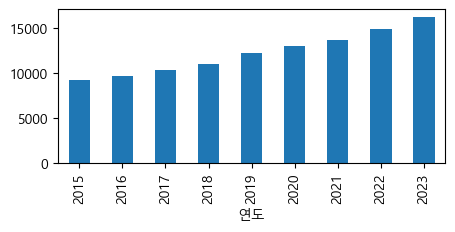

In [46]:
fig=plt.figure(figsize=(5,2))
ax1 = fig.subplots()

sr1=df_prep.groupby(['연도'])["분양가격"].mean()
sr1
sr1.plot.bar(ax=ax1)

## <실습2>
* 지역별로 평균(a1)대비 최대분양가격(m1)과 최소 분양가격의 차이(n1)를 구하고 bargraph로 그리시오
* (m1-n1)/a1

<Axes: xlabel='지역명'>

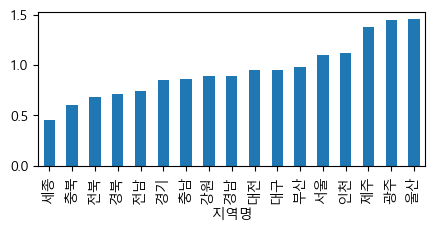

In [45]:
fig=plt.figure(figsize=(5,2))
ax1 = fig.subplots()

## 코드작성


## 다중 bargraph 그리기
* 1 )연도별 분양가격의 최소값을 구하시오 (mn)
* 2 )연도별 분양가격의 최대값을 구하시오 (mx)
* 3 ) mn, mx를 이용하여 ax1아래와 같이 그림을 그리시오
* (import cell의 plt.rc("font", family="Malgun Gothic") 코드로 인해 figure에 한글 표시 가능)

연도
2015    6164.4
2016    6270.0
2017    6520.8
Name: 분양가격, dtype: float64

연도
2015    23403.6
2016    26716.8
2017    26027.1
Name: 분양가격, dtype: float64

,max,min
연도,,
2015,23403.6,6164.4
2016,26716.8,6270.0
2017,26027.1,6520.8


<Axes: xlabel='연도'>

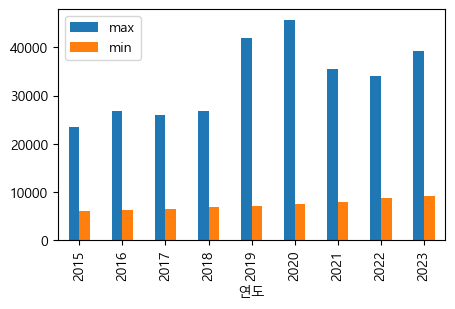

In [48]:
fig=plt.figure(figsize=(5,3))
ax1 = fig.subplots()
# 1)
## 코드작성 ##
mn=df_prep.groupby(['연도'])["분양가격"].min()
mn.head(3)
## 코드작성 끝 ##

# 2)
## 코드작성 ##
mx=df_prep.groupby(['연도'])["분양가격"].max()
mx.head(3)
## 코드작성 끝 ##


# 3)
## 코드작성 ##
mg=pd.concat([mx,mn], axis=1)
mg.columns=['max','min']
mg.head(3)
mg.plot.bar(ax=ax1)

## <실습3>
* 1) 지역별 분양가격의 최소값을 구하시오 (mn)
* 2) 지역별 분양가격의 최대값을 구하시오 (mx)
* 3) mn, mx를 이용하여 ax1에 아래와 같이 그림을 그리시오
* (단, max 값이 큰 순서대로 도시를 나열하여 시각화 하시오)

지역명
강원     6639.6
경기    10160.7
경남     7260.0
Name: 분양가격, dtype: float64

지역명
강원    14899.5
경기    22585.2
경남    16566.0
Name: 분양가격, dtype: float64

,max,min
지역명,,
서울,45655.5,16701.3
제주,27753.0,7342.5
울산,27188.7,7992.6


<Axes: xlabel='지역명'>

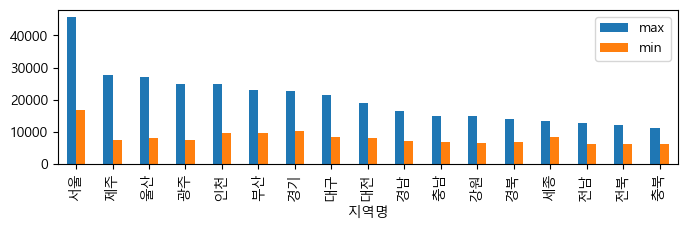

In [50]:
fig=plt.figure(figsize=(8,2))
ax1 = fig.subplots()
# 1)
## 코드작성 ##
mn=

# 2)
## 코드작성 ##


# 3)
## 코드작성 ##



# 두 개 group으로 groupby 결과 bar graph로 시각화 하기
* groupby return형: series
* pivot_table return형: dataframe

## 지역별, 전용면적별 분양가격 중앙값을 아래와 같이 시각화 하시오 (조건: pivot_table 사용)

분양가격
지역명 전용면적           
강원  102~     9645.9
    60~85    8167.5
    85~102   9451.2
    ~60      8415.0
    전체       8220.3
경기  102~    15496.8
    60~85   13912.8

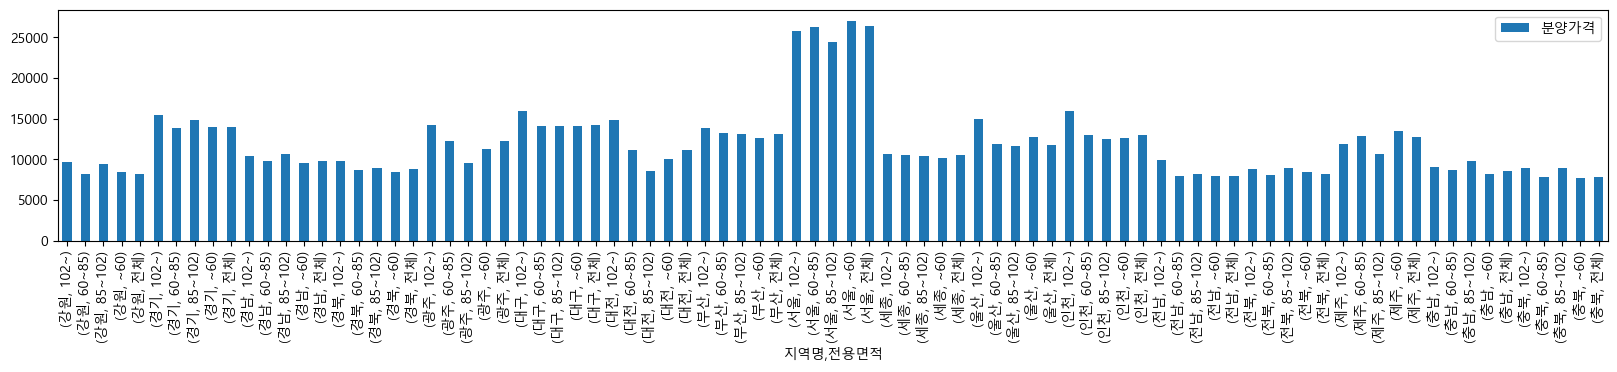

In [14]:
fig=plt.figure(figsize=(20,3))
ax1 = fig.subplots()

## 코드작성
## ax1
sr1=df_prep.pivot_table(index=['지역명','전용면적'], values='분양가격',aggfunc='median')
sr1.head(7)
_=sr1.plot.bar(ax=ax1)

## <실습4>
* 연도별, 전용면적별 최대값을 아래와 같이 시각화 하시오 (조건: groupby 사용)

연도    전용면적  
2015  102~      21618.3
      60~85     19687.8
      85~102    23403.6
      ~60       20859.3
      전체        19965.0
2016  102~      23895.3
      60~85     21572.1
Name: 분양가격, dtype: float64

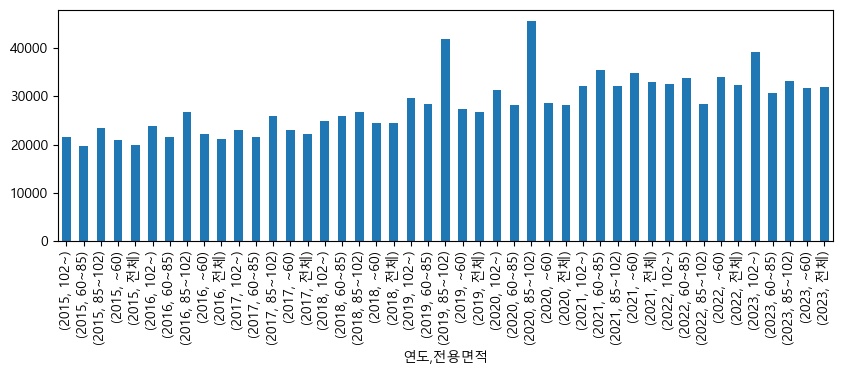

In [8]:
fig=plt.figure(figsize=(10,3))
ax1 = fig.subplots()

## 코드작성


# 두 개 group으로 groupby 결과에 unstack 적용하기

In [15]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
d1 = pd.Series(np.arange(1, 5), index=index)

print('############# d1')
d1

print('############# d1.unstack(0)')
d1.unstack(0)

print('############# d1.unstack(1)')
d1.unstack(1)

############# d1


one  a    1
     b    2
two  a    3
     b    4
dtype: int32

############# d1.unstack(0)


,one,two
a,1,3
b,2,4


############# d1.unstack(1)


,a,b
one,1,2
two,3,4


## unstack 시 nan의 등장

In [3]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'), ('one', 'c'),
                                   ('two', 'a'), ('two', 'b')])
s1 = pd.Series(np.arange(5), index=index)
print('############# s1')
s1
print('############# s1.unstack()')
s1.unstack()

############# s1


one  a    0
     b    1
     c    2
two  a    3
     b    4
dtype: int32

############# s1.unstack()


,a,b,c
one,0.0,1.0,2.0
two,3.0,4.0,NaN


## <실습5>
* 연도별, 전용면적별 분양가격의 최대값을 아래와 같이 시각화 하시오
* (groupby + unstack을 사용하시오)

전용면적,102~,60~85,85~102,~60,전체
연도,,,,,
2015,21618.3,19687.8,23403.6,20859.3,19965.0
2016,23895.3,21572.1,26716.8,22152.9,21261.9
2017,22931.7,21522.6,26027.1,23116.5,22129.8
2018,24898.5,26037.0,26723.4,24413.4,24413.4
2019,29663.7,28340.4,42002.4,27327.3,26730.0


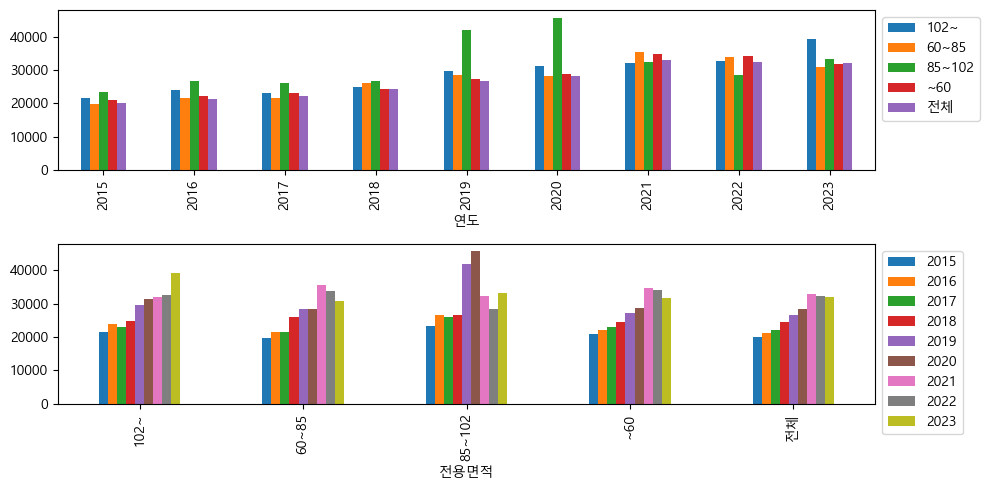

In [26]:
fig=plt.figure(figsize=(10,5))
ax1, ax2=fig.subplots(2,1)

## 코드작성
# ax1
df2=df_prep.groupby(['연도','전용면적'])['분양가격'].max().unstack(1)
df2.head()
_=df2.plot.bar(ax=ax1)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

# ax2
_=df2.T.plot.bar(ax=ax2)
_=ax2.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.tight_layout()

# pivot_table with 'columns' parameter
* #####################################################################
* groupby two groups + unstack <=====> pivot_table with columns parameter
* #####################################################################

## 지역별, 연도별 분양가격의 중앙값을 구하시오

In [32]:
## pivot_table with columns
df_prep.pivot_table(index="지역명", columns="연도", values="분양가격", aggfunc='median')

## groupby + unstack
df_prep.groupby(["지역명","연도"])["분양가격"].median().unstack(1)

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,7164.30,7060.35,7329.30,7877.10,8347.35,9705.30,9819.15,10992.30,12114.30
경기,10866.90,11375.10,11980.65,14290.65,15117.30,14531.55,14152.05,16353.15,19818.15
경남,7662.60,8020.65,8652.60,9226.80,10107.90,10254.75,10635.90,11965.80,13002.00
경북,7273.20,7570.20,7943.10,8654.25,8723.55,9923.10,10520.40,11941.05,12500.40
광주,7999.20,9002.40,9504.00,9550.20,12150.60,12909.60,13919.40,15137.10,17537.85
대구,8896.80,10332.30,11756.25,12203.40,13959.00,15312.00,15544.65,16556.10,17087.40
대전,8109.75,8520.60,9038.70,9807.60,11889.90,11063.25,12198.45,13790.70,16249.20
부산,10005.60,10320.75,11726.55,12709.95,13389.75,13266.00,14336.85,17909.10,19199.40
서울,19935.30,21367.50,21699.15,22827.75,26914.80,27832.20,29521.80,29412.90,30919.35


연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,7164.30,7060.35,7329.30,7877.10,8347.35,9705.30,9819.15,10992.30,12114.30
경기,10866.90,11375.10,11980.65,14290.65,15117.30,14531.55,14152.05,16353.15,19818.15
경남,7662.60,8020.65,8652.60,9226.80,10107.90,10254.75,10635.90,11965.80,13002.00
경북,7273.20,7570.20,7943.10,8654.25,8723.55,9923.10,10520.40,11941.05,12500.40
광주,7999.20,9002.40,9504.00,9550.20,12150.60,12909.60,13919.40,15137.10,17537.85
대구,8896.80,10332.30,11756.25,12203.40,13959.00,15312.00,15544.65,16556.10,17087.40
대전,8109.75,8520.60,9038.70,9807.60,11889.90,11063.25,12198.45,13790.70,16249.20
부산,10005.60,10320.75,11726.55,12709.95,13389.75,13266.00,14336.85,17909.10,19199.40
서울,19935.30,21367.50,21699.15,22827.75,26914.80,27832.20,29521.80,29412.90,30919.35


## <실습6>
* 연도별, 지역별 평균값을 아래와 같이 시각화 하시오
* (pivot_table columns 파라미터를 사용하시오)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615,21864.095,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


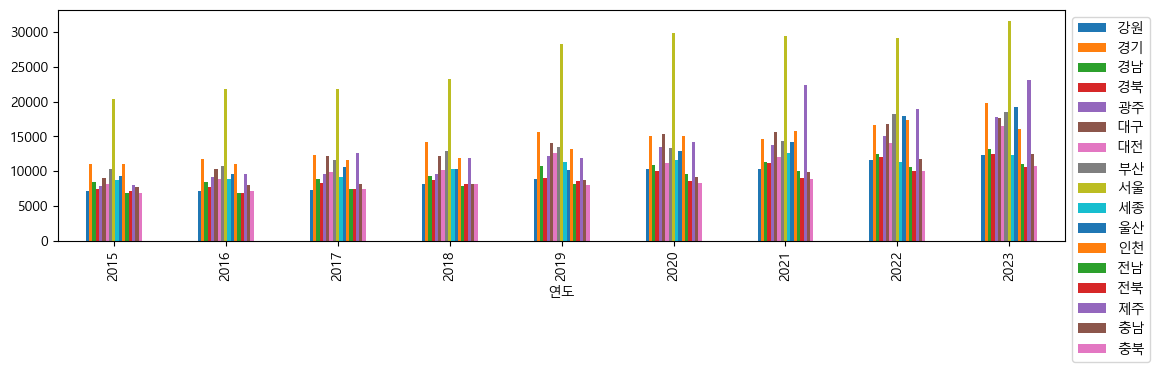

In [53]:
fig=plt.figure(figsize=(13,3))
ax1 = fig.subplots()

## 코드작성


# === 실습풀이 ===

## <실습1>
* 전용면적별로 분양가격의 평균을 구하고, 전용면적별로 그 평균보다 높은 값들의 비율을 구하시오
* (pivot_table, groupby 각각 사용)

In [38]:
def num_of_above_ave(sr1):
    m1=sr1.mean()
    num1=np.sum(sr1>m1)
    len1=len(sr1)
    
    return num1/len1

## pivot_table
df_prep.pivot_table(index='전용면적', values='분양가격', aggfunc=num_of_above_ave)
## groupby
df_prep.groupby(['전용면적'])['분양가격'].apply(num_of_above_ave)

,분양가격
전용면적,
102~,0.400844
60~85,0.365963
85~102,0.353543
~60,0.374417
전체,0.371009


전용면적
102~      0.400844
60~85     0.365963
85~102    0.353543
~60       0.374417
전체        0.371009
Name: 분양가격, dtype: float64

## <실습2>
* 지역별로 평균(a1)대비 최대분양가격(m1)과 최소 분양가격의 차이(n1)를 구하고 bargraph로 그리시오
* (m1-n1)/a1

<Axes: xlabel='지역명'>

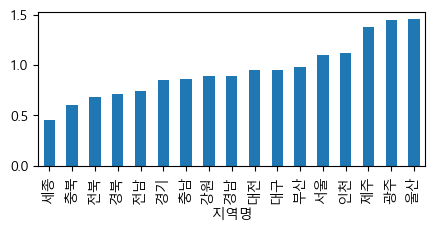

In [45]:
fig=plt.figure(figsize=(5,2))
ax1 = fig.subplots()

def f1(sr1):
    return (sr1.max()-sr1.min())/sr1.mean()
    
sr2=df_prep.groupby('지역명')['분양가격'].apply(f1).sort_values()
sr2.plot.bar(ax=ax1)

## <실습3>
* 1) 지역별 평당분양가격의 최소값을 구하시오 (mn)
* 2) 지역별 평당분양가격의 최대값을 구하시오 (mx)
* 3) mn, mx를 이용하여 ax1에 아래와 같이 그림을 그리시오
* (단, max 값이 큰 순서대로 도시를 나열하여 시각화 하시오)

지역명
강원     6639.6
경기    10160.7
경남     7260.0
Name: 분양가격, dtype: float64

지역명
강원    14899.5
경기    22585.2
경남    16566.0
Name: 분양가격, dtype: float64

,max,min
지역명,,
서울,45655.5,16701.3
제주,27753.0,7342.5
울산,27188.7,7992.6


<Axes: xlabel='지역명'>

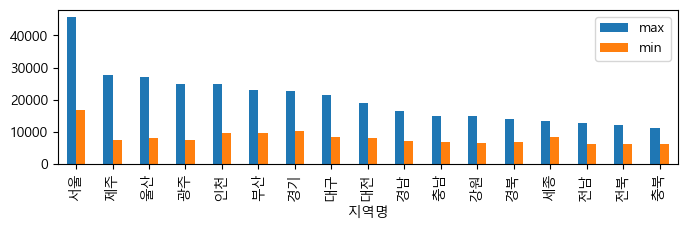

In [31]:
fig=plt.figure(figsize=(8,2))
ax1 = fig.subplots()
# 1)
## 코드작성 ##
mn=df_prep.groupby(['지역명'])["분양가격"].min()
mn.head(3)
## 코드작성 끝##

# 2)
## 코드작성 ##
mx=df_prep.groupby(['지역명'])["분양가격"].max()
mx.head(3)
## 코드작성 끝##

# 3)
### ax1
mg=pd.concat([mx,mn], axis=1)
mg.columns=['max','min']
mg2=mg.sort_values(by='max', ascending=False)
mg2.head(3)
mg2.plot.bar(ax=ax1)


## <실습4>
* 연도별, 전용면적별 최대값을 아래와 같이 시각화 하시오
* (조건: groupby 사용)

연도    전용면적  
2015  102~      21618.3
      60~85     19687.8
      85~102    23403.6
      ~60       20859.3
      전체        19965.0
2016  102~      23895.3
      60~85     21572.1
Name: 분양가격, dtype: float64

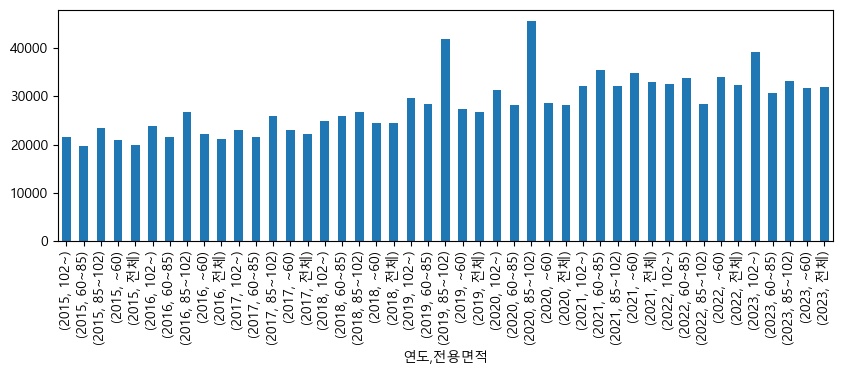

In [52]:
fig=plt.figure(figsize=(10,3))
ax1 = fig.subplots()

## 코드작성
## ax1
sr1=df_prep.groupby(['연도','전용면적'])['분양가격'].max()
sr1.head(7)
_=sr1.plot.bar(ax=ax1)

## <실습5>
* 연도별, 전용면적별 최대값을 아래와 같이 시각화 하시오
* (groupby + unstack을 사용하시오)

전용면적,102~,60~85,85~102,~60,전체
연도,,,,,
2015,21618.3,19687.8,23403.6,20859.3,19965.0
2016,23895.3,21572.1,26716.8,22152.9,21261.9
2017,22931.7,21522.6,26027.1,23116.5,22129.8
2018,24898.5,26037.0,26723.4,24413.4,24413.4
2019,29663.7,28340.4,42002.4,27327.3,26730.0


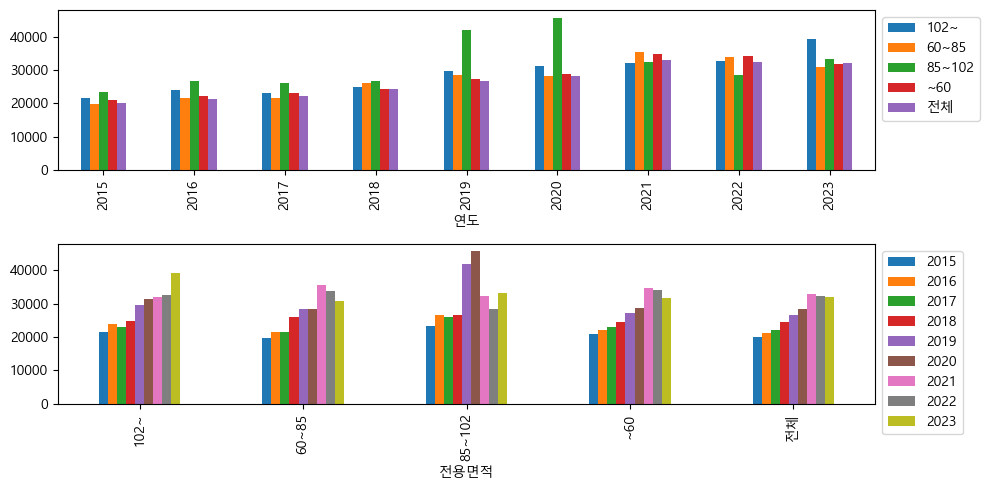

In [27]:
fig=plt.figure(figsize=(10,5))
ax1, ax2=fig.subplots(2,1)

## 코드작성
# ax1
df2=df_prep.groupby(['연도','전용면적'])['분양가격'].max().unstack(1)
df2.head()
_=df2.plot.bar(ax=ax1)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

# ax2
_=df2.T.plot.bar(ax=ax2)
_=ax2.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.tight_layout()

## <실습6>
* 연도별, 지역별 평균값을 아래와 같이 시각화 하시오
* (pivot_table columns 파라미터를 사용하시오)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615,21864.095,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


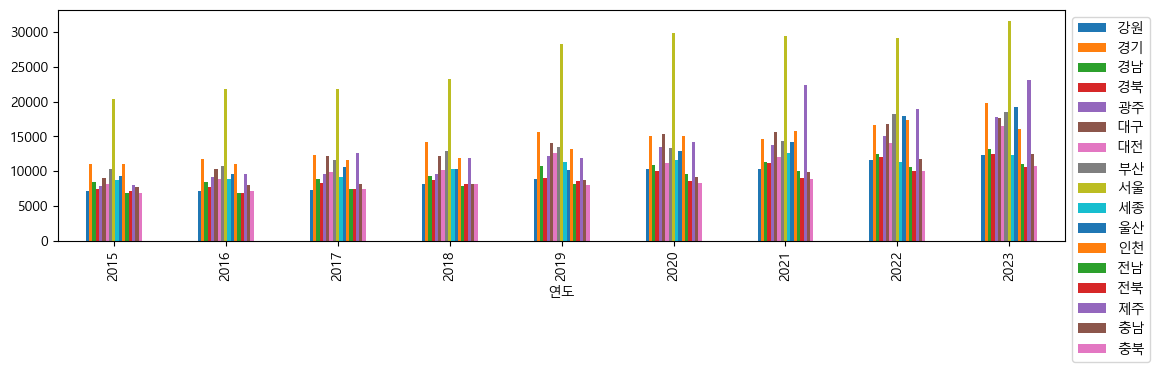

In [52]:
fig=plt.figure(figsize=(13,3))
ax1 = fig.subplots()

## 코드작성
# ax1

df1=df_prep.pivot_table(index='연도', columns='지역명', values='분양가격', aggfunc='mean')
df1.head()
_=df1.plot.bar(ax=ax1)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')